<a href="https://colab.research.google.com/github/DianaCorderoF/ML_DCCF/blob/main/Tarea_3_Estad%C3%ADstica_descriptiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Medidas Edad:
Media: 16.468645484949832
Mediana: 16.0
Moda: 15
Varianza: 1.2623948208073918
Desviación Estándar: 1.1235634476109446
Rango: 3
Percentil 75: 17.0
Coeficiente de Variación: 6.82243994284614
Medidas Tiempo de estudio semanal:
Media: 9.771991919431747
Mediana: 9.705363212574394
Moda: 19.833722807854716
Varianza: 31.94049792591937
Desviación Estándar: 5.65159251237378
Rango: 19.977037456615594
Percentil 75: 14.408409547514031
Coeficiente de Variación: 57.83460075458624
Medidas Inasistencias:
Media: 14.54138795986622
Mediana: 15.0
Moda: 25
Varianza: 71.6671833578482
Desviación Estándar: 8.465647249788299
Rango: 29
Percentil 75: 22.0
Coeficiente de Variación: 58.217601188780755
Medidas GPA:
Media: 1.9061863027265407
Mediana: 1.8933926937866847
Moda: 0.0
Varianza: 0.8371600458026294
Desviación Estándar: 0.9149645052146173
Rango: 4.0
Percentil 75: 2.622

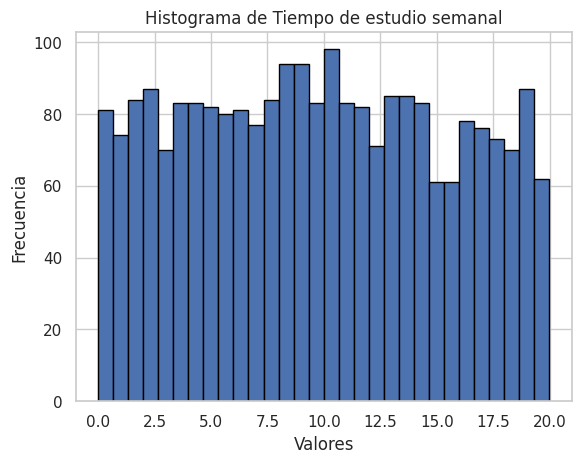

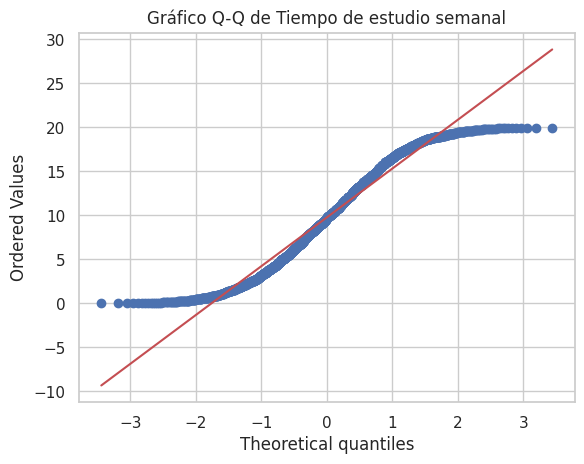

Prueba de Shapiro-Wilk: (0.9599897265434265, 3.592676187097648e-25)
Prueba de Kolmogorov-Smirnov: (0.055142485160590504, 9.200677631058412e-07)
Prueba de Anderson-Darling: (21.78924289279894, array([0.575, 0.655, 0.786, 0.916, 1.09 ]), array([15. , 10. ,  5. ,  2.5,  1. ]))
Pruebas para GPA:


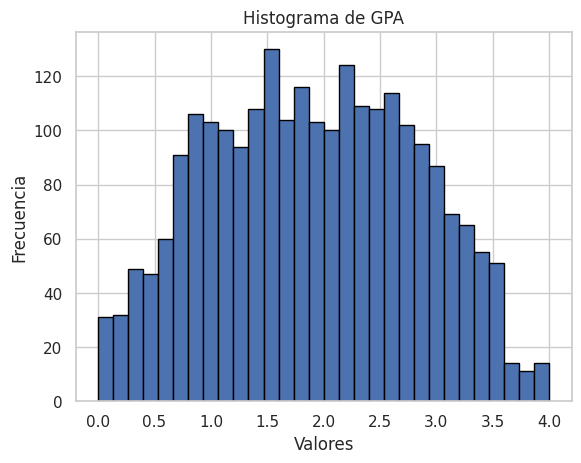

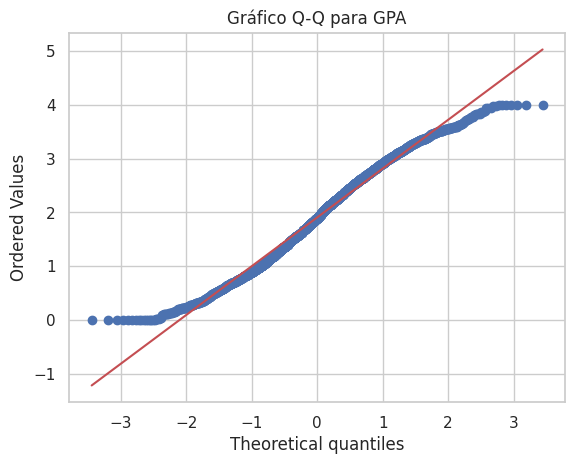

Prueba de Shapiro-Wilk: (0.9838155508041382, 7.264752243276286e-16)
Prueba de Kolmogorov-Smirnov: (0.03980916826454867, 0.0009908862810327128)
Prueba de Anderson-Darling: (9.31329010294894, array([0.575, 0.655, 0.786, 0.916, 1.09 ]), array([15. , 10. ,  5. ,  2.5,  1. ]))
Dados los resultados de las 3 pruebas para tiempo de estudio semanal, se concluye con un 95% de confianza que los datos no provienen de una distribución normal
La prueba de Shapiro-Wilk es la más contundente y sugiere fuertemente que los datos no siguen una distribución normal.La prueba de Kolmogorov-Smirnov también proporciona evidencia para rechazar la normalidad, aunque no tan fuerte como Shapiro-Wilk. La prueba de Anderson-Darling no proporciona suficiente evidencia para rechazar la normalidad a niveles de significancia comunes, pero contradice los resultados de las otras dos pruebas.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/AA_DCCF/SPD.csv')
df.head()

# Funciones: Medidas de tendencia central y dispersión
def media(datos):
    return sum(datos) / len(datos)

def mediana(datos):
    dat_ord = sorted(datos)
    n = len(datos)
    mitad = n // 2

    if n % 2 == 0:
        return (dat_ord[mitad - 1] + dat_ord[mitad]) / 2
    else:
        return dat_ord[mitad]

def moda(datos):
    frecuencia = {}
    for dato in datos:
        if dato in frecuencia:
            frecuencia[dato] += 1
        else:
            frecuencia[dato] = 1
    moda_v = max(frecuencia, key=frecuencia.get)
    return moda_v

def varianza(datos):
    promedio = media(datos)
    sumatoria = sum((x - promedio) ** 2 for x in datos)
    return sumatoria / len(datos)

def desviacion_estandar(datos):
    return varianza(datos) ** 0.5

def rango(datos):
    return max(datos) - min(datos)

def percentil(datos, percentil):
    dat_ord = sorted(datos)
    k = (len(datos) - 1) * percentil / 100
    f = int(k)
    c = k - f

    if f + 1 < len(datos):
        return dat_ord[f] + c * (dat_ord[f + 1] - dat_ord[f])
    else:
        return dat_ord[f]

def coeficiente_variacion(datos):
    return (desviacion_estandar(datos) / media(datos)) * 100


datos_edad = df['Age']
datos_stw = df['StudyTimeWeekly']
datos_abs = df['Absences']
datos_GPA = df['GPA']

#Medidas de tendencia central para cada columna:

print("Medidas Edad:")
print("Media:", media(datos_edad))
print("Mediana:", mediana(datos_edad))
print("Moda:", moda(datos_edad))
print("Varianza:", varianza(datos_edad))
print("Desviación Estándar:", desviacion_estandar(datos_edad))
print("Rango:", rango(datos_edad))
print("Percentil 75:", percentil(datos_edad, 75))
print("Coeficiente de Variación:", coeficiente_variacion(datos_edad))

print("Medidas Tiempo de estudio semanal:")
print("Media:", media(datos_stw))
print("Mediana:", mediana(datos_stw))
print("Moda:", moda(datos_stw))
print("Varianza:", varianza(datos_stw))
print("Desviación Estándar:", desviacion_estandar(datos_stw))
print("Rango:", rango(datos_stw))
print("Percentil 75:", percentil(datos_stw, 75))
print("Coeficiente de Variación:", coeficiente_variacion(datos_stw))

print("Medidas Inasistencias:")
print("Media:", media(datos_abs))
print("Mediana:", mediana(datos_abs))
print("Moda:", moda(datos_abs))
print("Varianza:", varianza(datos_abs))
print("Desviación Estándar:", desviacion_estandar(datos_abs))
print("Rango:", rango(datos_abs))
print("Percentil 75:", percentil(datos_abs, 75))
print("Coeficiente de Variación:", coeficiente_variacion(datos_abs))

print("Medidas GPA:")
print("Media:", media(datos_GPA))
print("Mediana:", mediana(datos_GPA))
print("Moda:", moda(datos_GPA))
print("Varianza:", varianza(datos_GPA))
print("Desviación Estándar:", desviacion_estandar(datos_GPA))
print("Rango:", rango(datos_GPA))
print("Percentil 75:", percentil(datos_GPA, 75))
print("Coeficiente de Variación:", coeficiente_variacion(datos_GPA))


#revisar si las variables de interés son conjuntos de datos paraamétricos o no paramétricos
# Histograma
def plot_histograma(datos, titulo):
    plt.hist(datos, bins=30, edgecolor='black')
    plt.title(titulo)
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')
    plt.show()

# Prueba de Shapiro-Wilk
def prueba_shapiro(datos):
    estadistico, p_valor = stats.shapiro(datos)
    return estadistico, p_valor

# Prueba de Kolmogorov-Smirnov
def prueba_ks(datos):
    estadistico, p_valor = stats.kstest(datos, 'norm', args=(np.mean(datos), np.std(datos)))
    return estadistico, p_valor

# Prueba de Anderson-Darling
def prueba_anderson(datos):
    resultado = stats.anderson(datos, dist='norm')
    return resultado.statistic, resultado.critical_values, resultado.significance_level

# Gráfico Q-Q
def plot_qq(datos, titulo):
    stats.probplot(datos, dist="norm", plot=plt)
    plt.title(titulo)
    plt.show()

# Aplicando pruebas  para evaluar Normalidad
print("Pruebas para Tiempo de estudio semanal:")
plot_histograma(datos_stw, "Histograma de Tiempo de estudio semanal")
plot_qq(datos_stw, "Gráfico Q-Q de Tiempo de estudio semanal")
print("Prueba de Shapiro-Wilk:", prueba_shapiro(datos_stw))
print("Prueba de Kolmogorov-Smirnov:", prueba_ks(datos_stw))
print("Prueba de Anderson-Darling:", prueba_anderson(datos_stw))

print("Pruebas para GPA:")
plot_histograma(datos_GPA, "Histograma de GPA")
plot_qq(datos_GPA, "Gráfico Q-Q para GPA")
print("Prueba de Shapiro-Wilk:", prueba_shapiro(datos_GPA))
print("Prueba de Kolmogorov-Smirnov:", prueba_ks(datos_GPA))
print("Prueba de Anderson-Darling:", prueba_anderson(datos_GPA))

print("Dados los resultados de las 3 pruebas para tiempo de estudio semanal, se concluye con un 95% de confianza que los datos no provienen de una distribución normal")
print("La prueba de Shapiro-Wilk es la más contundente y sugiere fuertemente que los datos no siguen una distribución normal.La prueba de Kolmogorov-Smirnov también proporciona evidencia para rechazar la normalidad, aunque no tan fuerte como Shapiro-Wilk. La prueba de Anderson-Darling no proporciona suficiente evidencia para rechazar la normalidad a niveles de significancia comunes, pero contradice los resultados de las otras dos pruebas.")